In [ ]:
#uploading our datasets from our working directory we need to mount our drive contents to the colab environment.

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

In [4]:
!pip install vecstack

  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19863 sha256=5fa986d86ccdabefc26e50c08461b0070e4c56e3091531970728a3fb292d8ac4
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [7]:
#importing all necessary libraries

from vecstack import stacking
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score #works
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from collections import Counter #for Smote,
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import uniform, randint

import warnings
warnings.filterwarnings("ignore")

In [8]:
#loading the training and testing datasets

trainfile = r'/content/RevisedHomesiteTrain1.csv'
train_data = pd.read_csv(trainfile)

testfile = r'/content/RevisedHomesiteTest1.csv'
test_data = pd.read_csv(testfile)

print(train_data.shape)
print(test_data.shape)
print(train_data.head())

(65000, 596)
(173836, 596)
   CoverageField11A  CoverageField11B  CoverageField1A  CoverageField1B  \
0                 2                 1               17               23   
1                 5                 9                6                8   
2                 4                 6                7               12   
3                15                23                3                2   
4                 4                 6                8               13   

   CoverageField2A  CoverageField2B  CoverageField3A  CoverageField3B  \
0               17               23               15               22   
1                6                8                5                7   
2                7               12                6               10   
3                3                2                2                2   
4                8               13                7               11   

   CoverageField4A  CoverageField4B  ...  PropertyField38_N  \
0               16  

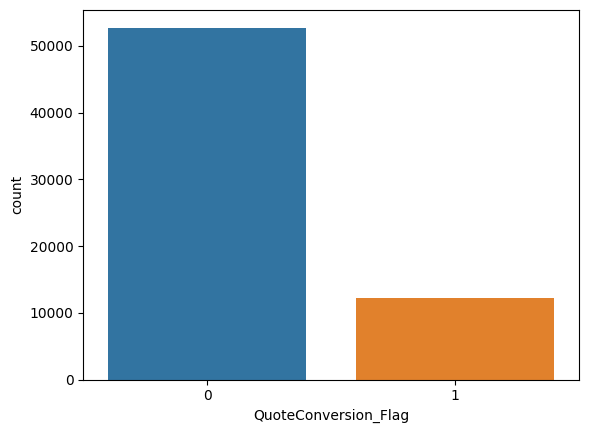

In [9]:
#bar graph showing the counts of each target value

sns.countplot(x="QuoteConversion_Flag", data=train_data)
plt.show()

In [10]:
target_column_name = ["QuoteConversion_Flag"]

In [11]:
#getting list of names of all Columns from a dataframe

TrainCols = list(train_data.columns.values)
TestCols = list(test_data.columns.values)
print(TrainCols)
print(TestCols)

['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A',

In [15]:
#calculating variance of each feature

variance = train_data.var().sort_values(ascending=False)
variance1 = test_data.var().sort_values(ascending=False)

#selecting the top 100 columns with highest variance

top_100_cols = variance.head(100).index.tolist()
top_100_cols_test = variance1.head(100).index.tolist()


#filtering the datasets to include only the top 100 columns

train_data_top_100 = train_data[top_100_cols]
test_data_top_100_Kaggle = test_data[top_100_cols_test]

#printing the shapes to verify

print(train_data_top_100.shape)
print(test_data_top_100.shape)

(65000, 100)
(173836, 100)


In [16]:
#seperating Target column from Train Data

Xtrain = train_data_top_100
Ytrain = train_data[['QuoteConversion_Flag']]
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = test_data_top_100
print(Xtest.shape)
print(Ytrain.value_counts())

(65000, 100)
(65000, 1)
(173836, 100)
QuoteConversion_Flag
0                       52738
1                       12262
dtype: int64


In [17]:
#applying SMOTE

sm = SMOTE(sampling_strategy=0.7)
X_res, y_res = sm.fit_resample(Xtrain, Ytrain)
print(y_res.value_counts())

QuoteConversion_Flag
0                       52738
1                       36916
dtype: int64


In [19]:
y_res.shape
test_data.shape

(173836, 596)

In [20]:
#splitting train and test data

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [21]:
#decision tree classifier and its accuracy

clf = DecisionTreeClassifier()
clf.fit(Xtrain,Ytrain)
clf_predict=clf.predict(Xtest)
print("accuracy Score (training) for Decision Tree:{0:6f}".format(clf.score(Xtest,Ytest)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Ytest,clf_predict))


accuracy Score (training) for Decision Tree:0.832357
Confusion Matrix for Decision Tree
[[9026 1581]
 [1425 5899]]


In [22]:
#random forest classifier and its accuracy

rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
rfc_predict=rfc.predict(Xtest)
print("accuracy Score (training) for RandomForest:{0:6f}".format(rfc.score(Xtest,Ytest)))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(Ytest,rfc_predict))

accuracy Score (training) for RandomForest:0.892477
Confusion Matrix for Random Forest:
[[10064   543]
 [ 1385  5939]]


In [23]:
#multiLayer perceptron model and its accuracy

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)
mlp.fit(Xtrain, Ytrain)
mlp_predict=mlp.predict(Xtest)
print("accuracy Score (training) for MultiLayer Perceptron:{0:6f}".format(mlp.score(Xtest,Ytest)))
print("Confusion Matrix for MultiLayer Perceptron:")
print(confusion_matrix(Ytest,mlp_predict))


accuracy Score (training) for MultiLayer Perceptron:0.639340
Confusion Matrix for MultiLayer Perceptron:
[[10022   585]
 [ 5882  1442]]


In [ ]:
#K-Nearest Neighbor model and its accuracy

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, Ytrain)
knn_predict=knn.predict(Xtest)
print("accuracy Score (training) for KNeighborsClassifier:{0:6f}".format(knn.score(Xtest,Ytest)))
print("Confusion Matrix for KNeighborsClassifier:")
print(confusion_matrix(Ytest,knn_predict))

In [ ]:
#stacking model

print("___________________________________________________________________________________________\nEnsemble Methods Predictions using GradientBoosting, RandomForest and Decision Tree Classifier\n")
models = [
    KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()
]
S_Train, S_Test = stacking(models,
                           X_res, y_res, test_data_top_100_Kaggle,
                           regression=False,

                           mode='oof_pred_bag',

                           needs_proba=False,

                           save_dir=None,

                           metric=accuracy_score,

                           n_folds=4,

                           stratified=True,

                           shuffle=True,

                           random_state=0,

                           verbose=2)


In [ ]:
#defining the parameters for RandomizedSearchCV

mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': uniform(0.0001, 0.01),
    'learning_rate': ['constant', 'adaptive'],
}

#creating the MLPClassifier instance

mlp = MLPClassifier(max_iter=1000, random_state=0)

In [ ]:
#performing RandomizedSearchCV to find the best hyperparameters

mlp_random = RandomizedSearchCV(mlp, mlp_params, n_iter=10, scoring='accuracy', cv=4, random_state=0)
mlp_random.fit(S_Train, y_res)

#printing the best hyperparameters and the corresponding accuracy

print("Best hyperparameters for MLPClassifier (RandomizedSearchCV):")
print(mlp_random.best_params_)
print("Best accuracy score: {:.6f}".format(mlp_random.best_score_))

#updating the model with the best hyperparameters and running predictions

best_mlp_model_random = mlp_random.best_estimator_
y_pred_random = best_mlp_model_random.predict(S_Test)

In [50]:
#prediction probability for the predicted class as a dataframe

pred_Probability =pd.DataFrame(model.predict_proba(S_Test))
pred_Probability.head()

,0,1
0,0.936597,0.063403
1,0.396036,0.603964
2,0.396036,0.603964
3,0.167050,0.832950
4,0.936597,0.063403


In [24]:
print(y_pred)

[1 0 1 ... 0 1 1]


In [52]:
#creating submission file to upload in Kaggle

predictions_df = pd.DataFrame({
    'QuoteNumber': test_data_top_100_Kaggle["QuoteNumber"],
    'QuoteConversion_Flag': pred_Probability[1]
})
predictions_df.to_csv('/content/Predictions2.csv', index=False)

In [35]:
test_data['QuoteNumber']

0              3
1              5
2              7
3              9
4             10
           ...  
173831    434570
173832    434573
173833    434574
173834    434575
173835    434589
Name: QuoteNumber, Length: 173836, dtype: int64